In [1]:
pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=9c10765bf476addb4407d93a92ebca278b9f0517dbd033fae7acd025414a7e38
  Stored in directory: c:\users\wkddns\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


# 1. CNN을 활용한 MNIST 손글씨 인식

In [ ]:
#학습 이력 확인하기
vloss = fit_history.history['val_loss'] # 테스트셋 loss
loss = fit_history.history['loss'] # 학습셋  

plt.figure(figsize=(12,5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, c='r', marker='.', label='validation_loss')
plt.plot(epoch, loss, c='b',  marker='.',label='loss')
plt.legend(loc='best')
plt.show()

In [ ]:
#학습 이력 확인하기
vacc = fit_history.history['val_accuracy'] # 테스트셋 
acc = fit_history.history['accuracy'] # 학습셋 정확도

plt.figure(figsize=(12,5))
epoch = np.arange(len(loss))
plt.plot(epoch, vacc, 'r', marker='.', label='validation_acc')
plt.plot(epoch, acc, 'b',  marker='.', label='accuracy')
plt.legend(loc='best')
plt.show()

# 2. 이미지 OCR- 연속 문자 인식 프로젝트

## (1) 이미지에서 글자가 있는 영역 추출

In [1]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

IMG_DIR = 'ocr/'
im = cv2.imread(IMG_DIR + 'numbers.png')
#그레이스케일로 변환하고 블러 --> 이진화하기
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)

contours = cv2.findContours(thresh, cv2.RETR_LIST,
                           cv2.CHAIN_APPROX_SIMPLE)
contours = contours[1] if imutils.is_cv3() else contours[0]

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if h < 20: continue
    red = (0,0,255)
    cv2.rectangle(im, (x,y), (x+w, y+h), red, 2)
cv2.imwrite(IMG_DIR+'numbers-cnt.png', im)

True

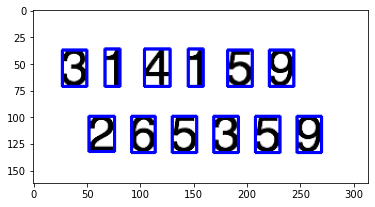

In [2]:
plt.imshow(im)
plt.show()

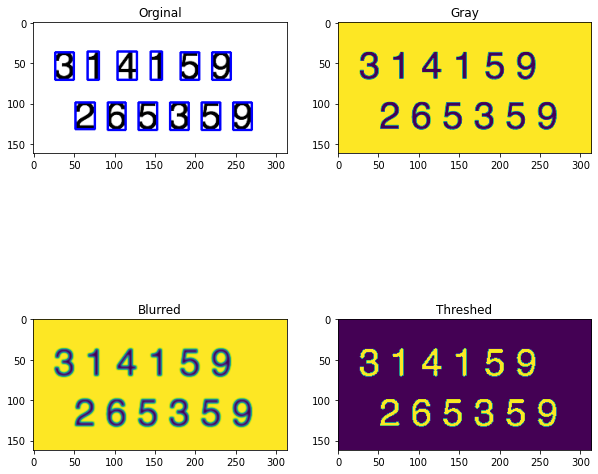

[255 255 255]
255
255
0


In [3]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Orginal')
plt.imshow(im)

plt.subplot(2,2,2)
plt.title('Gray')
plt.imshow(gray)

plt.subplot(2,2,3)
plt.imshow(blur)
plt.title('Blurred')


plt.subplot(2,2,4)
plt.imshow(thresh)
plt.title('Threshed')
plt.show()

print(im[0][0])
print(gray[0][0])
print(blur[0][0])
print(thresh[0][0])

In [6]:
# 이미지 읽어 들이기 
im = cv2.imread(IMG_DIR+'numbers100.png')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)

contours = cv2.findContours(thresh, cv2.RETR_LIST,
                           cv2.CHAIN_APPROX_SIMPLE)
contours = contours[1] if imutils.is_cv3() else contours[0]

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if h < 20: continue
    red = (0,0,255)
    cv2.rectangle(im, (x,y), (x+w, y+h), red, 2)

    
cv2.imwrite(IMG_DIR+'numbers100-cnt.PNG', im)

True

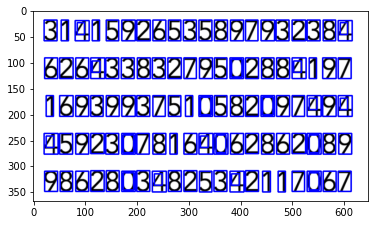

In [7]:
plt.imshow(im)
plt.show()

### ==> 영역 내 다른 영역 검출 제거

In [8]:
# 이미지 읽어 들이기 
im = cv2.imread(IMG_DIR+'numbers100.PNG')

gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)

contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
contours = contours[1] if imutils.is_cv3() else contours[0]

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if h < 20: continue
    red = (0,0,255)
    cv2.rectangle(im, (x,y), (x+w, y+h), red, 2)
    
    
cv2.imwrite(IMG_DIR+'numbers100-cnt-new.PNG', im)

True

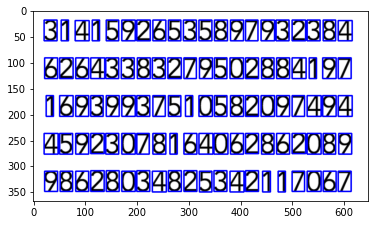

In [9]:
plt.imshow(im)
plt.show()

## (2)  개별 숫자 영역 추출하여 영상 리스트 만들기

In [10]:
# 이미지 읽어 들이기 
im = cv2.imread(IMG_DIR+'numbers100.PNG')

gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)

contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
contours = contours[1] if imutils.is_cv3() else contours[0]

cv2.imwrite(IMG_DIR+"numbers100-th.PNG", thresh)

True

In [12]:
rects = []
im_w = im.shape[1]
for i,cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    if w < 10 or h < 10: continue
    if w > im_w / 5 : continue
    y2 = round(y / 10) * 10
    index = y2 * im_w + x
    rects.append((index, x, y, w, h))
rects = sorted(rects, key= lambda x:x[0])

In [13]:
X = []
for i, r in enumerate(rects):
    index, x, y, w, h = r
    num = gray[y:y+h, x:x+w] # 부분 이미지 추출하기
    num = 255 - num # 반전하기
    # 정사각형 내부에 그림 옮기기
    ww = round((w if w>h else h) * 1.85)
    spc = np.zeros((ww, ww))
    wy = (ww-h) //2
    wx = (ww-w) //2
    spc[wy:wy+h, wx:wx+w] = num
    num = cv2.resize(spc, (28,28))
    X.append(num)

In [14]:
X = np.array(X)
X.shape

(100, 28, 28)

##  (3) MLP 모델로 인식하기

In [16]:
X_test = X.reshape(100, 28*28)
X_test.shape

(100, 784)

In [18]:
X_test = X_test.astype('float32')/ 255

In [19]:
from tensorflow.keras.models import load_model
modelfile = 'MNIST_digits_best_MLP.h5'
model = load_model(modelfile)

In [20]:
# 예측하기 
s = "31415926535897932384" + \
    "62643383279502884197" + \
    "16939937510582097494" + \
    "45923078164062862089" + \
    "98628034825342117067"
answer = list(s)

ng_list = []
ok = 0
nlist = model.predict(np.array(X_test))
for i, n in enumerate(nlist):
    ans = n.argmax()
    if ans == int(answer[i]):
        ok += 1
    else:
        print('[ng]', i, '번째', ans, '!=', answer[i], np.int32(n*100))
        ng_list.append(i)
print('정답률:', ok / len(nlist))
print('오답수:', len(ng_list))    

[ng] 0 번째 5 != 3 [ 4  5 10  3 11 28  9  5 13  6]
[ng] 1 번째 5 != 1 [ 4  5 10  3 11 28  8  5 13  6]
[ng] 2 번째 5 != 4 [ 4  5 10  3 12 28  8  5 13  6]
[ng] 3 번째 5 != 1 [ 4  5 10  3 11 28  8  5 13  6]
[ng] 5 번째 5 != 9 [ 4  5 10  3 12 28  8  5 13  6]
[ng] 6 번째 5 != 2 [ 4  5 10  3 11 28  9  5 13  6]
[ng] 7 번째 5 != 6 [ 4  5 10  3 11 28  9  5 14  6]
[ng] 9 번째 5 != 3 [ 4  5 10  3 11 28  9  5 13  6]
[ng] 11 번째 5 != 8 [ 4  5 10  3 11 28  9  5 13  6]
[ng] 12 번째 5 != 9 [ 4  5 10  3 12 28  8  5 13  6]
[ng] 13 번째 5 != 7 [ 4  5 10  3 11 29  9  5 13  6]
[ng] 14 번째 5 != 9 [ 4  5 10  3 12 28  8  5 13  6]
[ng] 15 번째 5 != 3 [ 4  5 10  3 11 28  9  5 13  6]
[ng] 16 번째 5 != 2 [ 4  5 10  3 11 28  9  5 13  6]
[ng] 17 번째 5 != 3 [ 4  5 10  3 11 28  9  5 13  6]
[ng] 18 번째 5 != 8 [ 4  5 10  3 11 28  9  5 13  6]
[ng] 19 번째 5 != 4 [ 4  5 10  3 12 28  8  5 13  6]
[ng] 20 번째 5 != 6 [ 4  5 10  3 11 28  9  5 14  6]
[ng] 21 번째 5 != 2 [ 4  5 10  3 11 28  9  5 13  6]
[ng] 22 번째 5 != 6 [ 4  5 10  3 11 28  9  5 14  6]
[ng] 23 

ValueError: num must be 1 <= num <= 18, not 19

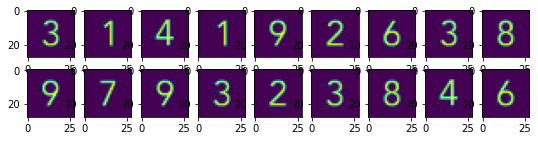

In [21]:
plt.figure(figsize=(9,2))
for i, idx in enumerate(ng_list):
    plt.subplot(2, 9, i+1)
    plt.imshow(X[idx])
plt.show()

## (4) CNN 모델로 인식하기

In [22]:
X_test = X.reshape(100, 28,28,1)
X_test.shape


(100, 28, 28, 1)

In [23]:
from tensorflow.keras.models import load_model
modelfile = 'MNIST_CNN_best.h5'
model = load_model(modelfile)

In [24]:
s = "31415926535897932384" + \
    "62643383279502884197" + \
    "16939937510582097494" + \
    "45923078164062862089" + \
    "98628034825342117067"
answer = list(s)

ng_list = []
ok = 0
nlist = model.predict(np.array(X_test))
for i, n in enumerate(nlist):
    ans = n.argmax()
    if ans == int(answer[i]):
        ok += 1
    else:
        print('[ng]', i, '번째', ans, '!=', answer[i], np.int32(n*100))
        ng_list.append(i)
print('정답률:', ok / len(nlist))
print('오답수:', len(ng_list))   

[ng] 37 번째 3 != 1 [  0   0   0 100   0   0   0   0   0   0]
[ng] 40 번째 3 != 1 [  0   0   0 100   0   0   0   0   0   0]
[ng] 49 번째 3 != 1 [  0   0   0 100   0   0   0   0   0   0]
[ng] 68 번째 3 != 1 [  0   0   0 100   0   0   0   0   0   0]
[ng] 94 번째 3 != 1 [  0   0   0 100   0   0   0   0   0   0]
[ng] 95 번째 3 != 1 [  0   0   0 100   0   0   0   0   0   0]
정답률: 0.94
오답수: 6


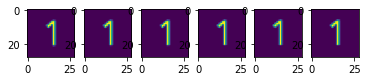

In [25]:
plt.figure(figsize=(9,2))
for i, idx in enumerate(ng_list):
    plt.subplot(2, 9, i+1)
    plt.imshow(X[idx])
plt.show()